## 1. Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>El Dr. Ignaz Semmelweis, un médico húngaro nacido en 1818 y activo en el Hospital General de Viena. En la década de 1840 en el Hospital General de Viena hasta el 10% de las mujeres que daban a luz morían a causa de la fiebre puerperal. El doctor estaba convencido de la causa de la fiebre puerperal: son las manos contaminadas de los médicos que dan a luz. 
<p>En este cuaderno, vamos a volver a analizar los datos que hicieron que Semmelweis descubriera la importancia de <em>lavarse las manos</em>. Comencemos mirando los datos que hicieron que Semmelweis se diera cuenta de que algo andaba mal con los procedimientos en el Hospital General de Viena.</p>

In [6]:
# Lee el dataset y visualiza sus datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

monthly_deaths_df=pd.read_csv("datasets/monthly_deaths.csv")
yearly_deaths_df=pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

print(yearly_deaths_df.head())
print(monthly_deaths_df.head())

   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1
         date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2


## 2. El alarmante número de muertes
<p>La tabla anterior muestra el número de mujeres que dieron a luz en las dos clínicas del Hospital General de Viena durante los años 1841 a 1846. Notarás que dar a luz era muy peligroso; un número <em>alarmante</em> de mujeres murió como resultado del parto, la mayoría de ellas por fiebre puerperal.</p>
<p>Vemos esto más claramente si observamos la <em>proporción de muertes</em> del número de mujeres que dan a luz.

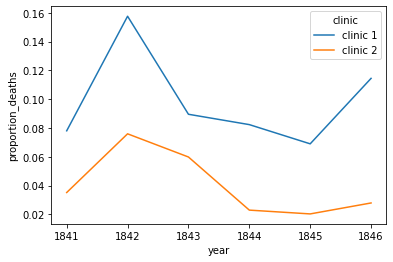

In [15]:
# Muestra la proporción de muertes por cada clínica y saca una conclusión del resultado

fig= plt.figure()
sns.lineplot(x='year', y='proportion_deaths', hue='clinic', data=yearly_deaths_df)
plt.show()

In [10]:
# Aunque gráficamente sea evidente, muestra matemáticamente si hay diferencias significativas 
# (incluye el redactado de planteamiento de hipotesis)

yearly_deaths_df["proportion_deaths"]=yearly_deaths_df["deaths"]/yearly_deaths_df["births"]

print(yearly_deaths_df.groupby('clinic')['proportion_deaths'].mean())

clinic
clinic 1    0.098505
clinic 2    0.040400
Name: proportion_deaths, dtype: float64


Por lo que he podido comprobar, en una de las clinicas tiene un mayor porcentaje de muertes a comparacion de la otra, voy a comprobar si esa diferencia es significativa, para ello voy a realizar un test de hipotesis: 

HO(hipotesis nula) el porcentaje de muertes es la misma en cada clinica
HA(hipotesis alternativa) el porcentaje de muertes es mayor en una de las clinicas


In [46]:
from pingouin import ttest
df_clinic1=yearly_deaths_df[yearly_deaths_df["clinic"]=="clinic 1"]
df_clinic2=yearly_deaths_df[yearly_deaths_df["clinic"]=="clinic 2"]

results=ttest(df_clinic2["proportion_deaths"],df_clinic1["proportion_deaths"],alternative='less')

print(results)

               T  dof alternative     p-val          CI95%   cohen-d    BF10  \
T-test -3.579697   10        less  0.002507  [-inf, -0.03]  2.066739  16.979   

           power  
T-test  0.953391  


veo que el p-value es menor de 0.05, por lo tanto se rechaza la hipotesis nula, en una de las clinicas tiene mas porcentaje de muertes que en la otra

## 3. Comienza el lavado de manos
<p>¿Por qué la proporción de muertes es consistentemente mucho más alta en la Clínica 1? Semmelweis vio el mismo patrón y estaba desconcertado y angustiado. La única diferencia era que los trabajadores de la clínica 2 solo atendían a las mujeres que daban a luz, mientras que los de la clínica 1 también pasaban tiempo en las salas de autopsias examinando cadáveres. </p>
<p>Semmelweis comenzó a sospechar que algo en los cadáveres se extendió de las manos de los estudiantes de medicina y causó fiebre puerperal.El doctor ordenó que se lavaran las manos, era considerada una propuesta rara ya que nadie en Viena sabía acerca de las bacterias en ese momento. </p>
<p>Carguemos los datos mensuales de la Clínica 1 para ver si el lavado de manos tuvo algún efecto.</p>

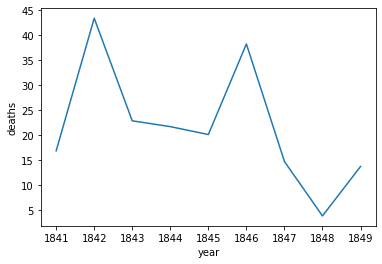

In [70]:
# Carga DataSet mensual
# Muestra gráficamente la evolución temporal, ¿Se nota algún efecto a partir de alguna fecha?

df_clinic1=yearly_deaths_df[yearly_deaths_df["clinic"]=="clinic 1"]

monthly_deaths_df["proportion_deaths"]=monthly_deaths_df["deaths"]/yearly_deaths_df["births"]

monthly_deaths_df["year"]=pd.DatetimeIndex(monthly_deaths_df["date"]).year


fig= plt.figure()
sns.lineplot(x='year', y='deaths', ci=None, data=monthly_deaths_df)

plt.show()




## 6. Se destaca el efecto del lavado de manos
<p>A partir del verano de 1847 (1847-06-01) la proporción de muertes se reduce drásticamente y, sí, fue entonces cuando Semmelweis hizo obligatorio el lavado de manos. </p>
<p>El efecto del lavado de manos se hace aún más claro si lo resaltamos en el gráfico.</p>

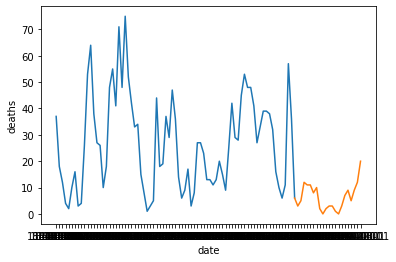

In [87]:
# Haz que en el gráfico se muestre la línea temporal en otro color a partir de esa fecha
# (Te va a costar un poco, pero espavila y busca en internet)



yearsum1=monthly_deaths_df[monthly_deaths_df["date"]<="1847-06-01"].groupby('date').sum()
yearsum2=monthly_deaths_df[monthly_deaths_df["date"]>="1847-06-01"].groupby('date').sum()

fig= plt.figure()
sns.lineplot(x='date', y='deaths', ci=None, data=yearsum1)
sns.lineplot(x='date', y='deaths', ci=None, data=yearsum2)
plt.show()


## 7. Lavado de manos, menos muertes?
<p>El doctor Semmelweis cuando propuso el lavado de manos, no solo prometió que se reduciriá las muertes respecto a las anteriores fechas, sino que incluso bajarían del 3% (una barbaridad teniendo en cuenta que en ese momento rondaba al 10%)</p> ¿Cumplió sus dos promesas?

In [88]:
# Te toca hacer dos test de hipotesis, uno de lavado vs no lavado y otro lavado vs 3%

print(yearsum1['deaths'].mean())
print(yearsum2['deaths'].mean())

26.83116883116883
6.454545454545454


Por lo que he podido comprobar, a paritr de que comenzaron a lavarse las manos bajo el porcentaje de muertes a comparacion de antes, voy a comprobar si esa diferencia es significativa, para ello voy a realizar un test de hipotesis: 

HO(hipotesis nula) el porcentaje de muertes es igual pasado los años
HA(hipotesis alternativa) el porcentaje de muertes es menor pasado los años


In [96]:
results=ttest(yearsum2["deaths"],yearsum1["deaths"],alternative='less', paired=True)

print(results)

results=ttest(yearsum2["deaths"]/yearsum2["births"],0.03,alternative='less')

print(results)

               T        dof alternative         p-val           CI95%  \
T-test -8.832412  96.984281        less  2.222135e-14  [-inf, -16.55]   

         cohen-d       BF10     power  
T-test  1.267069  2.028e+11  0.999814  
              T  dof alternative     p-val         CI95%  cohen-d   BF10  \
T-test -2.74868   21        less  0.006017  [-inf, 0.03]  0.58602  8.527   

           power  
T-test  0.844609  


c:\Users\marcg\anaconda3\lib\site-packages\pingouin\parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


veo que el p-value  es menor de 0.05, por lo tanto se rechaza la hipotesis nula, a partir de x mes a bajado las muertes

## 9. El destino del Dr. Semmelweis
<p>Entonces, en general, parecería que Semmelweis tenía pruebas sólidas de que lavarse las manos era un procedimiento simple pero muy eficaz que podía salvar muchas vidas.</p>
<p>La tragedia es que, a pesar de la evidencia, la teoría de Semmelweis —que la fiebre puerperal fue causada por alguna "sustancia" (lo que hoy conocemos como <em>bacteria</em>) de los cadáveres de la sala de autopsias— fue ridiculizada por el resto de científicos. La comunidad médica rechazó en gran medida su descubrimiento y en 1849 se vio obligado a abandonar el Hospital General de Viena para siempre.</p>
<p>Una de las razones de esto fue que las estadísticas y los argumentos estadísticos eran poco comunes en la ciencia médica en el siglo XIX. Semmelweis solo publicó sus datos como largas tablas de datos sin procesar, pero no mostró gráficos ni intervalos de confianza. Si hubiera tenido acceso al análisis que acabamos de hacer, podría haber tenido más éxito en conseguir que los médicos vieneses se lavaran las manos.</p>
¡Mala suerte crack!